## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 <U>과소 추정</U>하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산 보다 조금 큰 값이 된다.
- 표준화 : 평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향 분산
 - 분산은 표본 분산과 불편분산(unbiased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 때는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.
 
[표분분산이 분산을 과소 평가하는 이유]
- 호수안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링1 3마리{1,2,3} 표본평균 2, 샘플링2 {5,6,7} 표본평균 6 
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [11]:
import numpy as np
import pandas as pd

df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [12]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [13]:
score_df = pd.DataFrame({'score':scores},
#                         index = ['A','B','C','D','E','F','G','H','I','J'])
                       index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### 평균값
#### data.sum()/len(data)
#### np.mean

In [14]:
print(sum(scores)/len(scores))
print(np.mean(scores))
score_df.mean()

55.0
55.0


score    55.0
dtype: float64

### 중앙값

In [15]:
# 중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [16]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else:
    median = sorted_scores[(n+1)//2 - 1]
median

56.5

#### np.median

In [17]:
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

### 최빈값
#### mode()

In [18]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [19]:
##

In [20]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

### 편차(data-mean)

In [21]:
# 편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [22]:
np.mean(deviation)

0.0

In [23]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.

In [24]:
arr = np.random.randint(0,1000,size = 20)
m = np.mean(arr)
display(m)
dev = arr-m
display(dev)
display(np.sum(dev))

517.35

array([-110.35,   20.65, -186.35, -284.35,  471.65,  453.65,   61.65,
        195.65, -406.35,  272.65, -478.35,    5.65,   43.65,  109.65,
         25.65, -300.35, -178.35,  -29.35,  327.65,  -14.35])

-4.547473508864641e-13

### 분산(편차^2 의 평균)
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨.

In [25]:
np.mean(deviation ** 2)

86.0

#### np.var

In [26]:
np.var(scores)

86.0

In [27]:
score_df.var()

score    95.555556
dtype: float64

In [28]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [29]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

### 표준편차($\sqrt(var)$)

#### np.sqrt(np.var(data))

In [30]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

#### np.std

In [31]:
np.std(scores)

9.273618495495704

In [32]:
df.std(ddof=0)

score                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

### 범위

#### max - min

In [33]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

### 4분위수

#### np.percentile

In [34]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### 요약 통계표

In [35]:
# 요약 통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

## 정규화

In [36]:
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

평균: 55.0, 표준편차: 9.2736


### 표준화

####  표준화( 편차/표준편차 )-표준정규분포

In [37]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [38]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [39]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [40]:
score_df['deviation_value'] = z

In [41]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [42]:
df = pd.read_csv('./data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [43]:
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [44]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


### 계급값

In [45]:
# 계급값 : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

### 상대도수

#### freq / freq.sum()

In [46]:
# 상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

### 누적상대도수

#### np.cumsum(freq_data)

In [47]:
# 누적상대도수 : 해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [48]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


### 최빈값

#### idmax() , idmin()
- 데이터 프레임 내 값 가운데 최고값의 인덱스 위치 반환
- 데이터 프레임 내 값 가운데 최소값의 인덱스 위치 반환

In [49]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

### 시각화

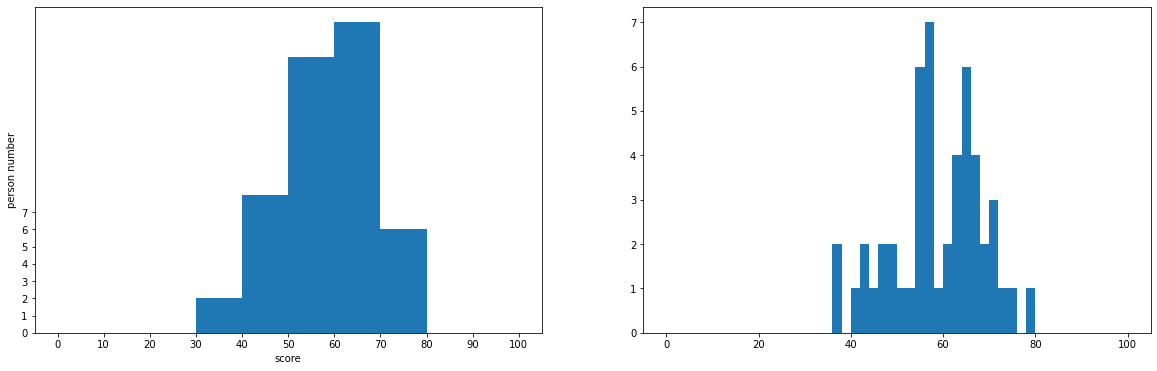

In [50]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
freq, _, _ = ax1.hist(eng_scores, bins=10, range=(0,100))
freq, _, _ = ax2.hist(eng_scores, bins=50, range=(0,100))
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))
ax1.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

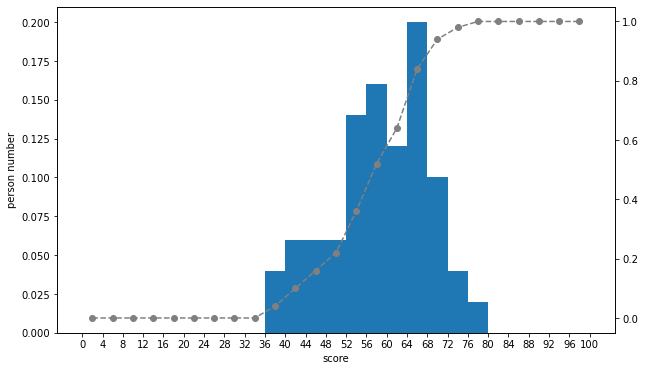

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins=25, range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls='--',marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()
plt.close()

#### boxplot 이상치 검색

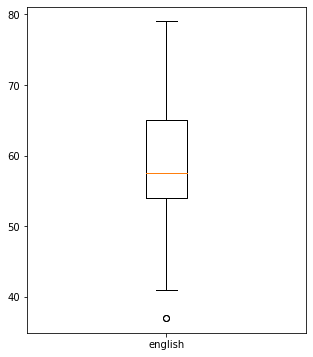

In [52]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

### 표본분산

In [53]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
print(mu)
s = np.sum((data-mu)**2)/len(data)
s

4.0


1.2

### 불편분산

In [54]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

## 과제

In [55]:
# [과제] 1변향 데이터 data에 대하여 평균, 표본분산, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요
# 단, 함수사용하는 경우와 사용하지 않는 경우를 모두 수행

In [56]:
arr = np.array([2,3,3,4,4,4,4,5,5,6])
arr
#평균
print(arr.mean())

#표본분산
print(np.sum((arr-arr.mean())**2)/len(arr))
print(np.var(arr,ddof=0))
#불편분산
print(np.sum((arr-arr.mean())**2)/(len(arr)-1))
print(np.var(arr,ddof=1))
#최대
print(arr.max())
#최소
print(arr.min())
#4분위수
arr_25 = np.percentile(arr,25)
arr_50 = np.percentile(arr,50)
arr_75 = np.percentile(arr,75)
IQR = arr_75-arr_25
IQR
#중앙값
if len(arr)%2 == 0:
    med_0 = arr[len(arr)//2-1]
    med_1 = arr[len(arr)//2]
    med = (med_0+med_1)/2
else:
    med = arr[(len(arr)+1)//2]
print(med)



4.0
1.2
1.2
1.3333333333333333
1.3333333333333333
6
2
4.0


## 2차원 데이터

In [57]:
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathematics':ms_scores},
                  index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


### 공분산

In [58]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation']*dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [59]:
dfc['product of deviation'].mean()

62.8

In [60]:
# ddof 확인 요
cov_mat = np.cov(en_scores,ms_scores,ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [61]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

### 상관계수

In [62]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [63]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [64]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


### 과제

In [65]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)

In [66]:
arr=np.random.randint(0,50,size=(10,2))
arr
np.var(arr[:,0],ddof=0), np.var(arr[:,1],ddof=0)
np.corrcoef(arr[:,0],arr[:,1])

array([[ 1.        , -0.41930334],
       [-0.41930334,  1.        ]])

In [67]:
arr = np.random.randint(0,100,20).reshape(10,2)
np.random.seed(0)
print(arr,'\n')
arr1 = arr[:,0]
arr2 = arr[:,1]
arr1_dev = arr1 - np.mean(arr1)
arr2_dev = arr2 - np.mean(arr2)
GBS = np.mean(arr1_dev*arr2_dev)
SGGS = np.cov(arr1,arr2,ddof=0)[0,1]/(np.std(arr1)*np.std(arr2))
print(f'공분산 : {GBS}')
print(f'상관계수 : {SGGS}')


[[70 81]
 [61 22]
 [17  8]
 [29 11]
 [60 74]
 [80 81]
 [42 28]
 [50 59]
 [ 2 80]
 [73 49]] 

공분산 : 238.87999999999997
상관계수 : 0.346437212423035


In [68]:
arr[:,0]

array([70, 61, 17, 29, 60, 80, 42, 50,  2, 73])

### 시각화

#### 산점도

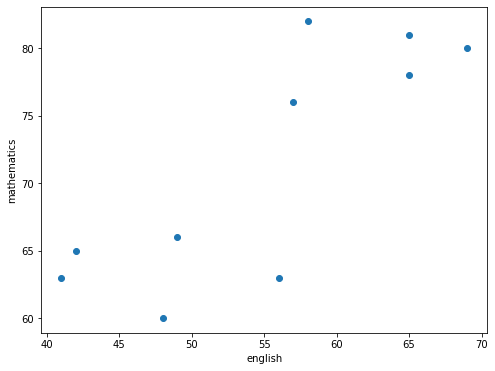

In [69]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()

#### 회귀직선


In [70]:
import numpy as np

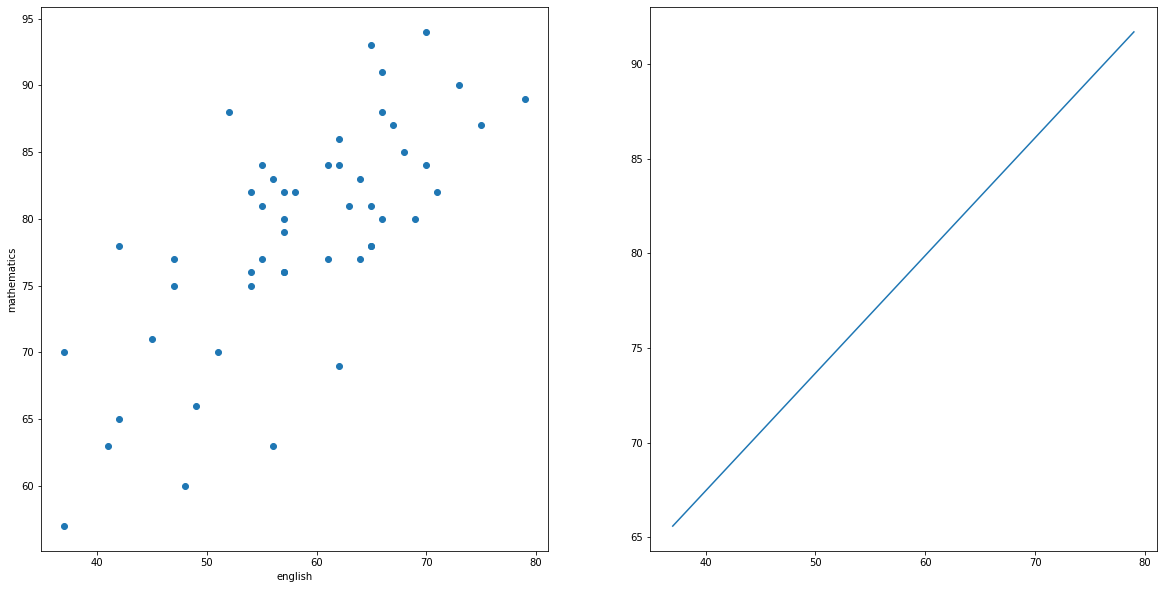

In [71]:
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])
# 계수 구하기
poly_fit=np.polyfit(eng_scores,math_scores,1) # 직선은 1차 방정식
poly_1d=np.poly1d(poly_fit)
xs=np.linspace(eng_scores.min(),eng_scores.max())
ys=poly_1d(xs)
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()

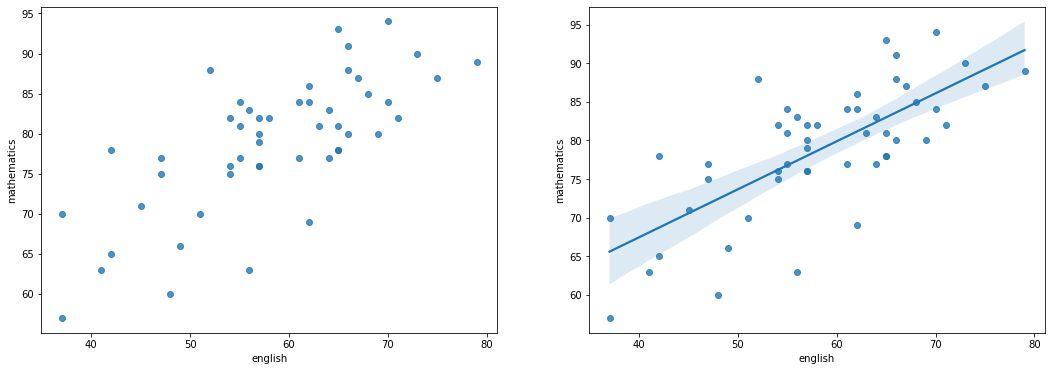

In [72]:
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0],x=df.english,y=df.mathematics,fit_reg=False)
sns.regplot(ax=axes[1],x=df.english,y=df.mathematics)
plt.show()


#### 다항곡선 회귀직선
https://qlsenddl-lab.tistory.com/48

#### 히트맵

In [73]:
# 영어와 수학 두변수의 상관관계를 히트맵으로 표현하세요.

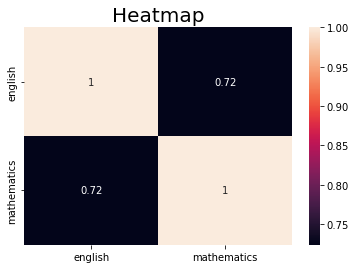

In [74]:
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap',fontsize=20)
plt.show()
plt.close()

##### hist2d

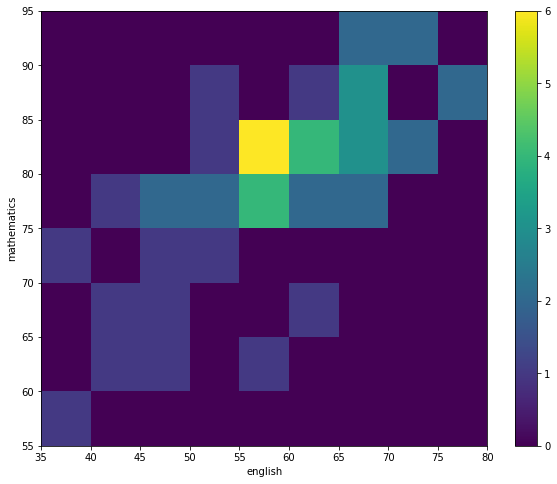

In [75]:
fig = plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
c= ax.hist2d(eng_scores,math_scores,
            bins=[9,8],range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [76]:
anscombe_date=np.load('./data/ch3_anscombe.npy')
print(anscombe_date.shape)
anscombe_date[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

### 통계량 테이블

In [77]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation',
                              'X&Y_regression line'])
for i, data in enumerate(anscombe_date):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
                             ]
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


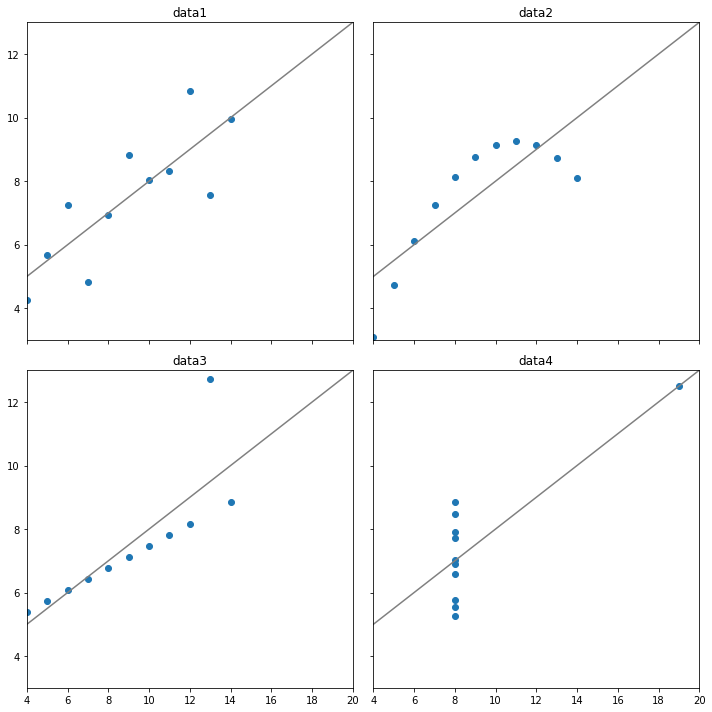

In [78]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),sharex=True, sharey=True)
xs=np.linspace(0,30,100)
for i, data in enumerate(anscombe_date):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d=np.poly1d(poly_fit)
    ys=poly_1d(xs)
    ax=axes[i//2,i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color='gray')
plt.tight_layout()
plt.show()
# 가장 이상적인 상태 data1
#상관계수가 같다고 같은 분포라 볼수 없다.

<AxesSubplot:xlabel='english', ylabel='mathematics'>

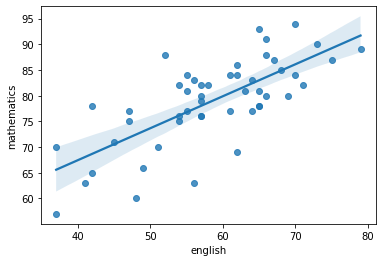

In [93]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.regplot('english','mathematics',data=df,fit_reg=True)

In [80]:
fdf = pd.read_csv('./data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [81]:
# species 그룹별 통계량을 구하세요

In [82]:
import warnings
warnings.filterwarnings(action='ignore')

In [83]:
fdf.groupby('species').describe()
# A=group.get_group('A').length
# B=group.get_group('B').length
# print(np.mean(A),np.median(A),np.max(A),np.min(A),np.percentile(A,[0,25,50,75,100]))
# print(np.mean(B),np.median(B),np.max(B),np.min(B),np.percentile(B,[0,25,50,75,100]))

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [84]:
import pandas as pd
sdf = pd.read_csv('./data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [85]:
# 각 컬러별 판매량을 파악할 수 있는 피봇 테이블을 작성하세요

In [86]:
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum')


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [87]:
pivot=pd.pivot_table(sdf, index='store',columns='color', values='sales',aggfunc='sum')
pivot

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [88]:
cdf=pd.read_csv('./data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [89]:
# x,y의 공분산b

In [90]:
x_dev = cdf.x - cdf.x.mean()
y_dev = cdf.y - cdf.y.mean()
(x_dev * y_dev).mean()
np.cov(x_dev,y_dev,ddof=1)

array([[ 3.64622222,  7.67333333],
       [ 7.67333333, 28.01111111]])

In [91]:
# 상관행렬을 구하세요

In [92]:
display( cdf.corr().round(2))

np.corrcoef(x_dev,y_dev)

,x,y
x,1.00,0.76
y,0.76,1.00


array([[1.       , 0.7592719],
       [0.7592719, 1.       ]])